In [1]:
# Modules to import
import argparse
import numpy as np
import pandas as pd
from openmm.unit import *

kT = 298 * kelvin * BOLTZMANN_CONSTANT_kB * AVOGADRO_CONSTANT_NA
kT = kT.in_units_of(kilocalories_per_mole)


def jacobian(dgs, errs, kT=kT):
    dgs = np.asarray(dgs)
    delta_dgs = np.asarray(errs)
    beta = 1 / kT

    exp_factors = np.exp(-beta * dgs)  
    sumup = np.sum(exp_factors)  # partition factor
    w = exp_factors / sumup  # weights

    dg_all = (-1 / beta) * np.log(sumup)

    # Error propagation for the sum of Boltzmann factors
    sigma_G = np.sqrt(np.sum((w**2) * (delta_dgs**2)))
    sigma_G_ = np.sqrt( np.sum( ((w * delta_dgs) / sumup)**2) )

    print(sigma_G, sigma_G_)
    return [dg_all._value, sigma_G]

In [9]:
np.log(1)

0.0

In [28]:
complex = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/complex_legs.txt", delim_whitespace=True
)
solv = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/mu_ex.txt",
    delim_whitespace=True,
)
solv.rename(columns={"Mu_Ex": "Solv", "Mu_Ex_err": "Solv_err"}, inplace=True)

reston = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/restraint_legs.txt",
    delim_whitespace=True,
)
restoff = pd.read_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/rest_off_legs.txt",
    delim_whitespace=True,
)

sym_number = pd.DataFrame()
sym_number["Ligand"] = complex["Ligand"].to_list()
sym_number["sym_corr"] = -kT._value * np.log(1)


all_data = complex.merge(solv).merge(reston).merge(restoff).merge(sym_number)

all_data["Ligand_stripped"] = all_data["Ligand"].str.split("_").str[0]

ligands = complex["Ligand"]

# unique_ligands = pd.read_csv(
#     "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/fep/unique_ligs.txt"
# )
# unique_ligands = unique_ligands[["Ligand"]]
# unique_ligands.rename(columns={"Ligand": "Name"}, inplace=True)


all_data["dG"] = (
    -all_data["Solv"]
    - all_data["Rest_off"]
    + all_data["Complex"]*-1
    - all_data["Restraints"]
)
all_data["dG_err"] = np.sqrt(all_data["Complex_err"] ** 2 + all_data["Solv_err"] ** 2 + all_data["Restraints_err"] ** 2,
)


# all_data["dG_plus"] = -all_data["Solv_plus"] - all_data["Rest_off"] +  all_data["Complex_plus"] - all_data["Restraints_plus"]
# all_data["dG_minus"] = -all_data["Solv_minus"] - all_data["Rest_off"] +  all_data["Complex_minus"] - all_data["Restraints_minus"]

all_data["dG_sym"] = all_data["dG"] + all_data["sym_corr"]

In [29]:
all_data

,Complex,Complex_err,Name,Ligand,Solv,Solv_err,Restraints,Restraints_err,Rest_off,Err,sym_corr,Ligand_stripped,dG,dG_err,dG_sym
0,16.34,0.41,S-SEC-BUTYL-THIAZOLE,01,-1.73,0.04,2.22,0.12,-6.57,0.0,-0.0,01,-10.26,0.429069,-10.26
1,17.90,0.19,R-SEC-BUTYL-THIAZOLINE,02,-1.76,0.02,1.57,0.17,-6.75,0.0,-0.0,02,-10.96,0.255734,-10.96
2,17.31,0.57,ISO-BUTYL-THIAZOLE,03,-1.73,0.03,1.48,0.06,-6.57,0.0,-0.0,03,-10.49,0.573934,-10.49
3,16.57,0.60,N-PROPYL-THIAZOLE,04,-1.96,0.04,2.35,0.50,-6.62,0.0,-0.0,04,-10.34,0.782049,-10.34
4,16.53,0.17,ISO-PROPYL-THIAZOLE,05,-1.99,0.03,1.48,0.10,-6.67,0.0,-0.0,05,-9.35,0.199499,-9.35
5,15.71,0.44,ETHYL-THIAZOLE,06,-2.20,0.05,1.69,0.11,-6.66,0.0,-0.0,06,-8.54,0.456289,-8.54
6,14.02,0.23,METHYL-THIAZOLE,07,-2.51,0.03,2.43,0.04,-6.76,0.0,-0.0,07,-7.18,0.235372,-7.18
7,12.04,0.33,Pentan-1-ol,08_0,-2.42,0.03,5.62,0.23,-6.56,0.0,-0.0,08,-8.68,0.403361,-8.68
8,13.60,0.50,Pentan-1-ol,08_1,-2.42,0.03,3.90,0.21,-6.61,0.0,-0.0,08,-8.47,0.543139,-8.47
9,13.50,0.16,Hexan-1-ol,09_1,-2.54,0.08,1.77,0.13,-5.48,0.0,-0.0,09,-7.25,0.221133,-7.25


In [30]:
unique_ligands = pd.DataFrame()
unique_ligands["Name"] = all_data["Ligand_stripped"].unique()
jacos_sym = [
    jacobian(
        all_data[all_data["Ligand_stripped"] == i][
            "dG_sym"
        ].tolist(),
        all_data[all_data["Ligand_stripped"] == i][
            "dG_err"
        ].tolist(),
    )
    for i in unique_ligands["Name"]
]

most_fav = [
    np.min(all_data[all_data["Ligand_stripped"] == i]["dG_sym"].tolist())
    for i in unique_ligands["Name"]
]
most_fav_ids = [
    np.argmin(all_data[all_data["Ligand_stripped"] == i]["dG_sym"].tolist())
    for i in unique_ligands["Name"]
]
most_fav_err = [
    all_data[all_data["Ligand_stripped"] == i]["dG_err"].tolist()[most_fav_ids[j]]
    for j, i in enumerate(unique_ligands["Name"])
]

0.4290687590584986 1.2826529139169917e-08
0.25573423705088844 2.344279003221418e-09
0.5739337940912697 1.1635043840241705e-08
0.782048591840686 2.0424247863656026e-08
0.19949937343260005 2.7726444310558607e-08
0.45628938186199336 2.490152729307544e-07
0.2353720459187964 1.276818630423933e-06
0.32609917646154196 8.257449733650863e-08
0.24192364506631098 4.858549463831797e-08
0.6406246951218787 4.84776613858455e-08
0.7343023900274327 2.9927870907004504e-09
0.3152776554086889 3.141103005970316e-06
0.7736278174936576 1.5513716718341229e-09
0.29698484809834996 3.2039138337359866e-08


In [31]:
# jacos_max = [jacobian(all_data[all_data['Ligand'].str.contains(i)]['dG_plus'].tolist()) for i in unique_ligands["Name"]]
# jacos_min = [jacobian(all_data[all_data['Ligand'].str.contains(i)]['dG_minus'].tolist()) for i in unique_ligands["Name"]]
jacos_sym = np.asarray(jacos_sym)


unique_ligands["final_dG_sym"] = jacos_sym[:, 0]
unique_ligands["final_err"] = jacos_sym[:, 1]


unique_ligands["most_fav"] = most_fav
unique_ligands["most_fav_err"] = most_fav_err



In [32]:
unique_ligands

,Name,final_dG_sym,final_err,most_fav,most_fav_err
0,01,-10.260000,0.429069,-10.26,0.429069
1,02,-10.960000,0.255734,-10.96,0.255734
2,03,-10.490000,0.573934,-10.49,0.573934
3,04,-10.340000,0.782049,-10.34,0.782049
4,05,-9.350000,0.199499,-9.35,0.199499
5,06,-8.540000,0.456289,-8.54,0.456289
6,07,-7.180000,0.235372,-7.18,0.235372
7,08,-8.994733,0.326099,-8.68,0.403361
8,09,-9.132000,0.241924,-8.67,0.372693
9,10,-9.710000,0.640625,-9.71,0.640625


In [33]:
all_data

,Complex,Complex_err,Name,Ligand,Solv,Solv_err,Restraints,Restraints_err,Rest_off,Err,sym_corr,Ligand_stripped,dG,dG_err,dG_sym
0,16.34,0.41,S-SEC-BUTYL-THIAZOLE,01,-1.73,0.04,2.22,0.12,-6.57,0.0,-0.0,01,-10.26,0.429069,-10.26
1,17.90,0.19,R-SEC-BUTYL-THIAZOLINE,02,-1.76,0.02,1.57,0.17,-6.75,0.0,-0.0,02,-10.96,0.255734,-10.96
2,17.31,0.57,ISO-BUTYL-THIAZOLE,03,-1.73,0.03,1.48,0.06,-6.57,0.0,-0.0,03,-10.49,0.573934,-10.49
3,16.57,0.60,N-PROPYL-THIAZOLE,04,-1.96,0.04,2.35,0.50,-6.62,0.0,-0.0,04,-10.34,0.782049,-10.34
4,16.53,0.17,ISO-PROPYL-THIAZOLE,05,-1.99,0.03,1.48,0.10,-6.67,0.0,-0.0,05,-9.35,0.199499,-9.35
5,15.71,0.44,ETHYL-THIAZOLE,06,-2.20,0.05,1.69,0.11,-6.66,0.0,-0.0,06,-8.54,0.456289,-8.54
6,14.02,0.23,METHYL-THIAZOLE,07,-2.51,0.03,2.43,0.04,-6.76,0.0,-0.0,07,-7.18,0.235372,-7.18
7,12.04,0.33,Pentan-1-ol,08_0,-2.42,0.03,5.62,0.23,-6.56,0.0,-0.0,08,-8.68,0.403361,-8.68
8,13.60,0.50,Pentan-1-ol,08_1,-2.42,0.03,3.90,0.21,-6.61,0.0,-0.0,08,-8.47,0.543139,-8.47
9,13.50,0.16,Hexan-1-ol,09_1,-2.54,0.08,1.77,0.13,-5.48,0.0,-0.0,09,-7.25,0.221133,-7.25


In [34]:
# unique_ligands.to_csv(
#     "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/final_FEP.txt",
#     sep="\t",
#     columns=["final_dG", "final_err", "Name"],
#     header=False,
#     index=False,
# )
unique_ligands.to_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/final_FEP_sym.txt",
    columns=["final_dG_sym", "final_err", "Name"],
    sep="\t",
    header=False,
    index=False,
)
unique_ligands.to_csv(
    "/home/will/data_6/LIG_GCNCMC_PAPER/REVIEW_ANALYSIS/final_figures_to_go_in/MUP1/fep_new_err/final_FEP_mostfav.txt",
    columns=["most_fav", "most_fav_err", "Name"],
    sep="\t",
    header=False,
    index=False,
)

# Symmetry cycle closures

Here we're going to make as many cycles as possible with 3 ligands of different symmetries and calculate the cycle closure errors from FEP, FEP with sym and Titration

In [283]:
unique_ligands

,Name,final_dG,final_err
0,Benzene,-4.057052,0.066368
1,Benzofuran,-4.178394,0.233119
2,Indene,-4.532699,0.217662
3,Indole,-2.530461,0.524968
4,Toluene,-4.015257,0.138022
5,Ethylbenzene,-5.748466,0.384298
6,m-xylene,-3.811424,0.283144
7,o-xylene,-4.251092,0.025877
8,Phenol,-1.237085,0.245853
9,Propylbenzene,-3.241267,0.282072


In [284]:
unique_ligands["sym"] = [12, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1]

In [286]:
diff_syms = unique_ligands["sym"].unique()

In [290]:
sym_1 = unique_ligands[unique_ligands["sym"] == 1]["Name"].tolist()
sym_2 = unique_ligands[unique_ligands["sym"] == 2]["Name"].tolist()
sym_12 = unique_ligands[unique_ligands["sym"] == 12]["Name"].tolist()


In [292]:
import itertools

In [293]:
combinations = list(itertools.product(sym_1, sym_2, sym_12))

In [295]:
len(combinations)

24

In [310]:
dgs


[-4.057052375794704, -1.237085017023408, -4.836715090019364]

In [325]:
1.527 + 1.2929 - 2.82

-0.00010000000000021103

In [327]:
dgs

[10   -4.836715
 Name: final_dG, dtype: float64,
 8   -1.237085
 Name: final_dG, dtype: float64,
 0   -4.057052
 Name: final_dG, dtype: float64]

In [330]:
_ = unique_ligands[unique_ligands["Name"] == l].final_dG

In [337]:
_

-4.178393630160509

In [367]:
cc = []
cc_sym = []
print("Combination                                 dgs                                                 cycle")
for comb in combinations:
    dgs = []
    for l in comb:
        dgs.append(unique_ligands[unique_ligands["Name"] == l].final_dG.iloc[0])
    
    cc.append((dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2]))
    print(comb, dgs, (dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2]))

Combination                                 dgs                                                 cycle
('Benzofuran', 'Toluene', 'Benzene') [-4.178393630160509, -4.015256927954914, -4.057052375794704] 0.0
('Benzofuran', 'm-xylene', 'Benzene') [-4.178393630160509, -3.8114242945957626, -4.057052375794704] 0.0
('Benzofuran', 'o-xylene', 'Benzene') [-4.178393630160509, -4.251091604685329, -4.057052375794704] 0.0
('Benzofuran', 'Phenol', 'Benzene') [-4.178393630160509, -1.237085017023408, -4.057052375794704] 0.0
('Indene', 'Toluene', 'Benzene') [-4.532699080512173, -4.015256927954914, -4.057052375794704] 0.0
('Indene', 'm-xylene', 'Benzene') [-4.532699080512173, -3.8114242945957626, -4.057052375794704] 0.0
('Indene', 'o-xylene', 'Benzene') [-4.532699080512173, -4.251091604685329, -4.057052375794704] 0.0
('Indene', 'Phenol', 'Benzene') [-4.532699080512173, -1.237085017023408, -4.057052375794704] 0.0
('Indole', 'Toluene', 'Benzene') [-2.530461012402761, -4.015256927954914, -4.057052375794704] 

In [391]:
dgs = [-4.057, -1.24, -2.873]

In [392]:
dgs[1] - dgs[0]

2.817

In [393]:
dgs[1] - dgs[2]

1.6330000000000002

In [394]:
dgs[0] - dgs[2]

-1.1840000000000002

In [395]:
(dgs[1] - dgs[0]) + (dgs[2] - dgs[1]) + (dgs[0] - dgs[2])

-2.220446049250313e-16

In [364]:
-4.17 - -4.057

-0.11299999999999955

In [363]:
-4.057--4.17

0.11299999999999955

In [319]:
unique_ligands

,Name,final_dG,final_err,sym
0,Benzene,-4.057052,0.066368,12
1,Benzofuran,-4.178394,0.233119,1
2,Indene,-4.532699,0.217662,1
3,Indole,-2.530461,0.524968,1
4,Toluene,-4.015257,0.138022,2
5,Ethylbenzene,-5.748466,0.384298,1
6,m-xylene,-3.811424,0.283144,2
7,o-xylene,-4.251092,0.025877,2
8,Phenol,-1.237085,0.245853,2
9,Propylbenzene,-3.241267,0.282072,1


In [305]:
unique_ligands[unique_ligands["Name"].isin(comb)].final_dG

0    -4.057052
8    -1.237085
10   -4.836715
Name: final_dG, dtype: float64

In [65]:
from matplotlib import pyplot as plt

In [100]:
def func_heav(x, K, ref):
    return np.heaviside(x - ref, 0) * K/2 * abs((x - ref))**2

def func(x, K, ref):
    return K/2 * abs((x - ref))**2

In [96]:
x = np.linspace(0, 2)

In [102]:
y = func(x, 0.5, 0.5)
y2 = func_heav(x, 0.5, 0.5)

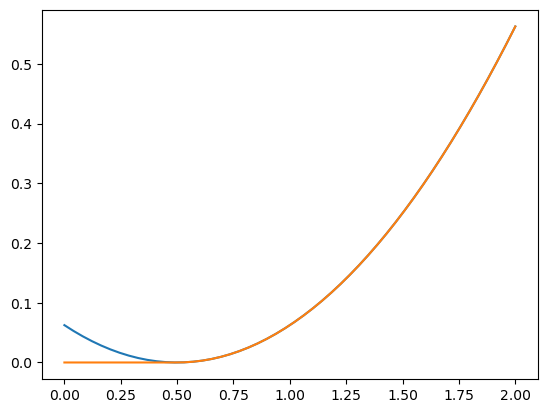

In [103]:
plt.plot(x, y)
plt.plot(x, y2)


In [76]:
ddfunc(0.5, 10, 0.5)

0.0